In [ ]:
#
# https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
#
base_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995'

files = [f'{base_url}.{year}.nc' for year in range(1948, 2019)]
files


import xarray as xr
%matplotlib inline

ds = xr.open_mfdataset(files)
ds 

import netCDF4 as nc

# read multiple files (wildcard)
vn = nc.MFDataset('/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/cq317a.pm20*.nc') 

# read multiple files (file list)
#vn = nc.MFDataset(['data_y1997','data_y1998','data_y1999'])

# Variable from multiple files.
#airv = vn.variables['ts']

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import geocat.viz as gv



In [2]:
np.random.seed(200)
data = np.random.lognormal(size=(40, 3), mean=1, sigma=.7)
for a in range(len(data)):
    data[a] = [x - 4 for x in data[a]]

In [3]:
def setBoxColor(boxplot, colors):

    # Set edge color of the outside and median lines of the boxes
    for element in ['boxes', 'medians']:
        for box, color in zip(boxplot[element], colors):
            plt.setp(box, color=color)

    # Set the color of the whiskers and caps of the boxes
    for element in ['whiskers', 'caps']:
        for box, color in zip(
                zip(boxplot[element][::2], boxplot[element][1::2]), colors):
            plt.setp(box, color=color)

In [4]:
def removeSpines(ax):

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

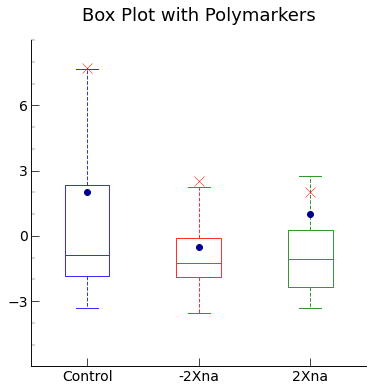

In [5]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each boxplot, set tick labels, and determine box widths
boxplots = ax.boxplot(data,
                      labels=['Control', '-2Xna', '2Xna'],
                      widths=[0.4, 0.4, 0.4],
                      showfliers=False)

# Set whisker style to dashed
plt.setp(boxplots['whiskers'], linestyle='--')

# Set boxplot edge colors
setBoxColor(boxplots, ['blue', 'red', 'green'])

# Use geocat.viz.util convenience function to set axes tick values
gv.set_axes_limits_and_ticks(ax, ylim=(-6.0, 9.0), yticks=[-3.0, 0.0, 3.0, 6.0])

# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax,
                         y_minor_per_major=3,
                         x_minor_per_major=1,
                         labelsize=14)

# Use geocat.viz.util convenience function to add title to the plot axis.
gv.set_titles_and_labels(ax, maintitle='Box Plot with Polymarkers')

# Make both major and minor ticks point inwards towards the plot
ax.tick_params(direction="in", which='both')

# Get rid of right and top axis spines
removeSpines(ax)

# Set ticks only at left and bottom sides of plot
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Add another partially transparent axis on top of the first one
ax2 = ax.inset_axes([0, 0, 1, 1])
ax2.patch.set_alpha(0.2)

# Set limits of second axis so markers will line up with boxes on boxplot
ax2.set_xlim(0, 6)
ax2.set_ylim(-6, 9)

# Turn both major and minor ticks in overlayed axis off
ax2.tick_params(which='both',
                top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=False,
                labelbottom=False)

# Get rid of right and top axis spines
removeSpines(ax2)

# Plot red x markers
ax2.scatter(1, 7.7, marker='x', color='red', linewidth=.5, s=100)
ax2.scatter(3, 2.5, marker='x', color='red', linewidth=.5, s=100)
ax2.scatter(5, 2, marker='x', color='red', linewidth=.5, s=100)

# Plot blue o markers
ax2.scatter(1, 2, marker='o', color='darkblue')
ax2.scatter(3, -0.5, marker='o', color='darkblue')
ax2.scatter(5, 1, marker='o', color='darkblue')

plt.show()